In [151]:
# import sys
# !{sys.executable} -m pip install tensorflow

In [431]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

In [432]:
FILE_NAME = "BT_data_with_lists.xlsx"
df = pd.read_excel(FILE_NAME)
df["cbalance_level"] = df["balance_level"].cumsum()

<function matplotlib.pyplot.show(close=None, block=None)>

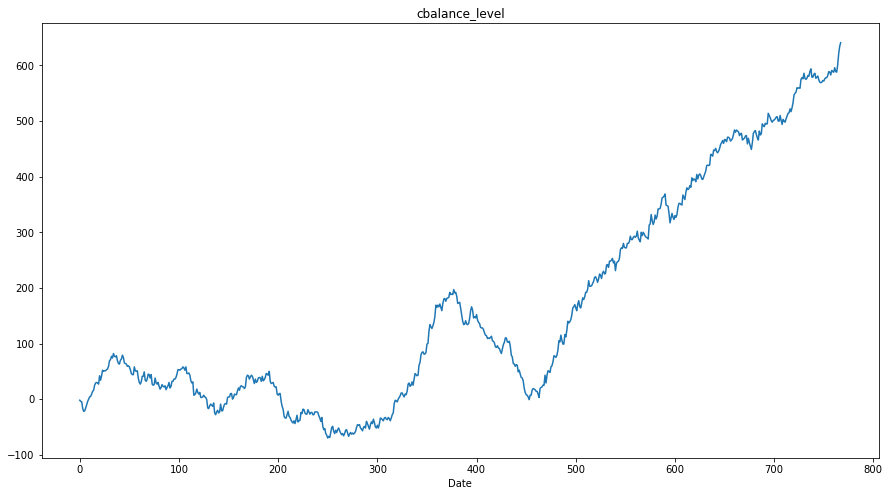

In [433]:
plt.figure(figsize=(15,8))
plt.title('cbalance_level')
plt.plot(df['cbalance_level'])
plt.xlabel('Date')
plt.show

In [434]:
data = df.filter(['cbalance_level'])
dataset = data.values
len(dataset)

768

In [435]:
training_data_size = math.ceil(len(dataset)*.70)
training_data_size

538

In [436]:
# normalize data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [437]:
# specific the shape of input, 60 observation of the sample
train_data = scaled_data[0:training_data_size, :]
print(train_data)
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
#     if i<=60:
#         print(x_train)
#         print(y_train)
        

[[0.09563994]
 [0.092827  ]
 [0.09142053]
 [0.0745429 ]
 [0.06751055]
 [0.06891702]
 [0.07594937]
 [0.08438819]
 [0.092827  ]
 [0.09845288]
 [0.10407876]
 [0.10548523]
 [0.11111111]
 [0.11814346]
 [0.1209564 ]
 [0.13361463]
 [0.13924051]
 [0.14064698]
 [0.13924051]
 [0.13642757]
 [0.15752461]
 [0.14627286]
 [0.15752461]
 [0.17158931]
 [0.16877637]
 [0.17018284]
 [0.17018284]
 [0.17299578]
 [0.17440225]
 [0.1814346 ]
 [0.1954993 ]
 [0.19831224]
 [0.20675105]
 [0.20253165]
 [0.2137834 ]
 [0.20675105]
 [0.20534459]
 [0.20815752]
 [0.1954993 ]
 [0.18846695]
 [0.18706048]
 [0.19690577]
 [0.19971871]
 [0.20956399]
 [0.20393812]
 [0.18987342]
 [0.18846695]
 [0.18706048]
 [0.1814346 ]
 [0.18284107]
 [0.18002813]
 [0.17299578]
 [0.16315049]
 [0.16033755]
 [0.16033755]
 [0.18002813]
 [0.17018284]
 [0.16877637]
 [0.17018284]
 [0.15189873]
 [0.14064698]
 [0.13642757]
 [0.14205345]
 [0.15611814]
 [0.15611814]
 [0.1673699 ]
 [0.14627286]
 [0.14345992]
 [0.14908579]
 [0.16174402]
 [0.16033755]
 [0.15

In [438]:
x_train, y_train = np.array(x_train), np.array(y_train)
# LSTM: input 3d - number of shapes, number of steps, number of features
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(478, 60, 1)

In [439]:
# using sequential to build LSTM model
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [440]:
# model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# model.fit(x_train, y_train, batch_size=1, epochs=1)
history = regressor.fit(x_train, y_train, epochs = 800, batch_size = 32)

Epoch 1/800
15/15 [==============================] - 13s 122ms/step - loss: 0.0186
Epoch 2/800
15/15 [==============================] - 2s 126ms/step - loss: 0.0037
Epoch 3/800
15/15 [==============================] - 2s 120ms/step - loss: 0.0024
Epoch 4/800
15/15 [==============================] - 2s 121ms/step - loss: 0.0018
Epoch 5/800
15/15 [==============================] - 2s 122ms/step - loss: 0.0015
Epoch 6/800
15/15 [==============================] - 2s 125ms/step - loss: 0.0016
Epoch 7/800
15/15 [==============================] - 2s 122ms/step - loss: 0.0015
Epoch 8/800
15/15 [==============================] - 2s 129ms/step - loss: 0.0012
Epoch 9/800
15/15 [==============================] - 2s 128ms/step - loss: 0.0013
Epoch 10/800
15/15 [==============================] - 2s 132ms/step - loss: 0.0012
Epoch 11/800
15/15 [==============================] - 2s 129ms/step - loss: 0.0010
Epoch 12/800
15/15 [==============================] - 2s 125ms/step - loss: 0.0012
Epoch 13/800

15/15 [==============================] - 2s 156ms/step - loss: 4.0830e-04
Epoch 97/800
15/15 [==============================] - 2s 138ms/step - loss: 4.6780e-04
Epoch 98/800
15/15 [==============================] - 2s 145ms/step - loss: 4.0547e-04
Epoch 99/800
15/15 [==============================] - 2s 139ms/step - loss: 3.6040e-04
Epoch 100/800
15/15 [==============================] - 2s 134ms/step - loss: 4.7190e-04
Epoch 101/800
15/15 [==============================] - 2s 131ms/step - loss: 3.9296e-04
Epoch 102/800
15/15 [==============================] - 2s 146ms/step - loss: 3.8305e-04
Epoch 103/800
15/15 [==============================] - 3s 208ms/step - loss: 4.7491e-04
Epoch 104/800
15/15 [==============================] - 2s 149ms/step - loss: 5.7923e-04
Epoch 105/800
15/15 [==============================] - 2s 152ms/step - loss: 4.1059e-04
Epoch 106/800
15/15 [==============================] - 2s 141ms/step - loss: 3.7001e-04
Epoch 107/800
15/15 [============================

15/15 [==============================] - 2s 149ms/step - loss: 3.6194e-04
Epoch 189/800
15/15 [==============================] - 2s 159ms/step - loss: 2.9415e-04
Epoch 190/800
15/15 [==============================] - 2s 139ms/step - loss: 3.0915e-04
Epoch 191/800
15/15 [==============================] - 2s 141ms/step - loss: 2.6391e-04
Epoch 192/800
15/15 [==============================] - 2s 148ms/step - loss: 2.7723e-04
Epoch 193/800
15/15 [==============================] - 2s 151ms/step - loss: 3.0860e-04
Epoch 194/800
15/15 [==============================] - 2s 165ms/step - loss: 2.9372e-04
Epoch 195/800
15/15 [==============================] - 2s 150ms/step - loss: 2.4739e-04
Epoch 196/800
15/15 [==============================] - 2s 140ms/step - loss: 3.0255e-04
Epoch 197/800
15/15 [==============================] - 2s 147ms/step - loss: 3.3634e-04 2s - lo
Epoch 198/800
15/15 [==============================] - 2s 138ms/step - loss: 3.7339e-04
Epoch 199/800
15/15 [=================

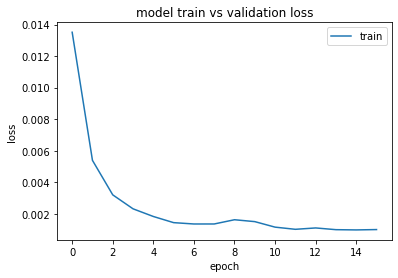

In [423]:
# plot train and validation loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [424]:
test_data = scaled_data[training_data_size - 60: ,:]
x_test = []
y_test = dataset[training_data_size, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [425]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [426]:
predictions = model.predict(x_test)

In [427]:
predictions = scaler.inverse_transform(predictions)

In [428]:
predictions

array([[190.95493],
       [192.97656],
       [194.94615],
       [197.27641],
       [198.7089 ],
       [199.24338],
       [199.14777],
       [198.56104],
       [197.36255],
       [196.35948],
       [196.17369],
       [196.62512],
       [198.19235],
       [200.5499 ],
       [203.24838],
       [205.61449],
       [207.6904 ],
       [209.38272],
       [210.45805],
       [211.60188],
       [212.8144 ],
       [213.8908 ],
       [214.83945],
       [215.82776],
       [216.72444],
       [217.22356],
       [218.11655],
       [219.23576],
       [220.30132],
       [220.36192],
       [220.19861],
       [219.74944],
       [219.47052],
       [219.56577],
       [219.92836],
       [220.36514],
       [220.761  ],
       [220.04643],
       [219.12553],
       [218.05708],
       [218.23009],
       [219.82753],
       [222.07704],
       [224.19524],
       [226.60875],
       [228.86798],
       [230.47961],
       [231.93437],
       [233.43924],
       [234.83824],


In [429]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

33.572867153001866

In [402]:
train = data[:training_data_size]
valid = data[training_data_size:]

In [403]:
valid['predictions'] = predictions

<ipython-input-403-add9aff4bf78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


In [404]:
valid.head(5)

,cbalance_level,predictions
538,245,190.954926
539,248,192.976562
540,231,194.946152
541,244,197.276413
542,247,198.708893


<ipython-input-405-78b812477c69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

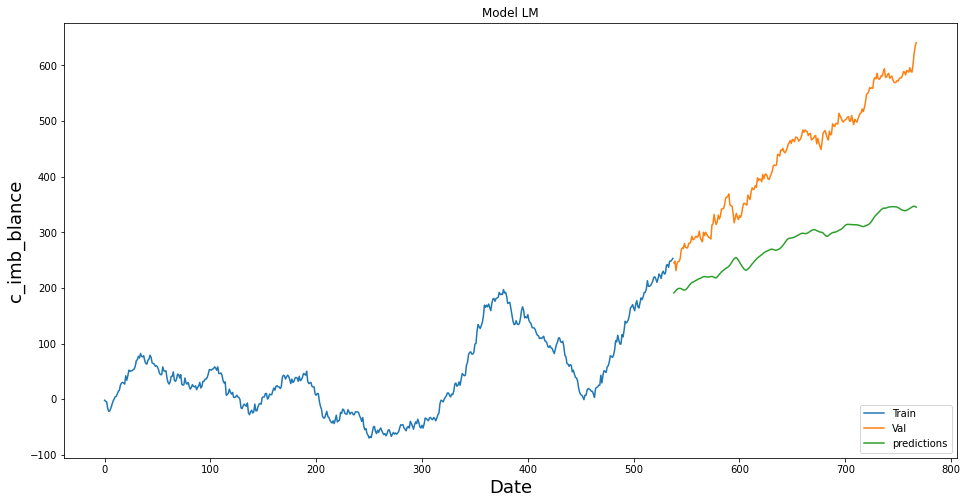

In [405]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model LM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('c_imb_blance', fontsize=18)
plt.plot(train['cbalance_level'])
plt.plot(valid[['cbalance_level','predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show

In [46]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, training_date.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(training_date[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(training_date[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(658, 60, 1)
(658, 1)


In [47]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(658, 60, 1)

In [50]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [51]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
21/21 [==============================] - 29s 228ms/step - loss: 0.1366
Epoch 2/50
21/21 [==============================] - 4s 195ms/step - loss: 0.0273
Epoch 3/50
21/21 [==============================] - 4s 184ms/step - loss: 0.0222
Epoch 4/50
21/21 [==============================] - 4s 185ms/step - loss: 0.0219
Epoch 5/50
21/21 [==============================] - 4s 168ms/step - loss: 0.0226
Epoch 6/50
21/21 [==============================] - 4s 171ms/step - loss: 0.0230
Epoch 7/50
21/21 [==============================] - 4s 206ms/step - loss: 0.0209
Epoch 8/50
21/21 [==============================] - 4s 183ms/step - loss: 0.0204
Epoch 9/50
21/21 [==============================] - 4s 179ms/step - loss: 0.0221
Epoch 10/50
21/21 [==============================] - 4s 166ms/step - loss: 0.0204
Epoch 11/50
21/21 [==============================] - 4s 209ms/step - loss: 0.0206
Epoch 12/50
21/21 [==============================] - 4s 179ms/step - loss: 0.0209
Epoch 13/50
21/21 [=====

In [54]:
testing_data

array([[0.63265306],
       [0.67346939],
       [0.7755102 ],
       [0.55102041],
       [0.53061224],
       [0.65306122],
       [0.46938776],
       [0.51020408],
       [0.46938776],
       [0.81632653],
       [0.55102041],
       [0.44897959],
       [0.69387755],
       [0.30612245],
       [0.44897959],
       [0.53061224],
       [0.59183673],
       [0.46938776],
       [0.65306122],
       [0.59183673],
       [0.18367347],
       [0.48979592],
       [0.59183673],
       [0.53061224],
       [0.30612245],
       [0.53061224],
       [0.53061224],
       [0.34693878],
       [0.40816327],
       [0.46938776],
       [0.51020408],
       [0.55102041],
       [0.46938776],
       [0.57142857],
       [0.53061224],
       [0.48979592],
       [0.57142857],
       [0.63265306],
       [0.46938776],
       [0.3877551 ],
       [0.65306122],
       [0.44897959],
       [0.46938776],
       [0.65306122],
       [0.34693878],
       [0.46938776],
       [0.75510204],
       [0.897

In [60]:
testing_data

array([[[0.63265306]],

       [[0.67346939]],

       [[0.7755102 ]],

       [[0.55102041]],

       [[0.53061224]],

       [[0.65306122]],

       [[0.46938776]],

       [[0.51020408]],

       [[0.46938776]],

       [[0.81632653]],

       [[0.55102041]],

       [[0.44897959]],

       [[0.69387755]],

       [[0.30612245]],

       [[0.44897959]],

       [[0.53061224]],

       [[0.59183673]],

       [[0.46938776]],

       [[0.65306122]],

       [[0.59183673]],

       [[0.18367347]],

       [[0.48979592]],

       [[0.59183673]],

       [[0.53061224]],

       [[0.30612245]],

       [[0.53061224]],

       [[0.53061224]],

       [[0.34693878]],

       [[0.40816327]],

       [[0.46938776]],

       [[0.51020408]],

       [[0.55102041]],

       [[0.46938776]],

       [[0.57142857]],

       [[0.53061224]],

       [[0.48979592]],

       [[0.57142857]],

       [[0.63265306]],

       [[0.46938776]],

       [[0.3877551 ]],

       [[0.65306122]],

       [[0.44897

In [59]:
testing_data = np.reshape(testing_data, (testing_data.shape[0], testing_data.shape[1], 1))

In [61]:
imb_lvl = regressor.predict(testing_data)